<a href="https://colab.research.google.com/github/tobyzawthuhtet/landuse_landcover_classification_with_deep_learning/blob/main/K_NNC_and_K_Means_classification_Satellite_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyrsgis

In [18]:
!pip install gdal

In [4]:
!pip install earthpy gdal

     |████████████████████████████████| 1.4MB 7.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0MB 40.1MB/s 
     |████████████████████████████████| 19.3MB 1.4MB/s 
     |████████████████████████████████| 15.4MB 126kB/s 
     |████████████████████████████████| 6.6MB 36.6MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp37-none-any.whl size=1365096 sha256=40ea667242c33b42fc98a982cc855877a7e4a333b78efec6051758827396e856
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


# **K-Nearest Neighbour Classifier (K-NNC) clasifier**


# **Importing Libraries**


In [5]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from pyrsgis import raster
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
from pyrsgis.convert import changeDimension

**Setting up directories**

In [6]:
data = '/content/drive/MyDrive/Build Up extraction using DL V2/Copy of Sentinel 2.tif'
label ='/content/drive/MyDrive/Build Up extraction using DL/training_labels2.tif'

In [7]:
#Reading training data and testing data
ds1, featuresTrain = raster.read(data, bands='all')
ds2, featuresTest = raster.read(label, bands ='all')

In [8]:
print(featuresTrain.shape)
print(featuresTest.shape)

(13, 1546, 1652)
(1546, 1652)


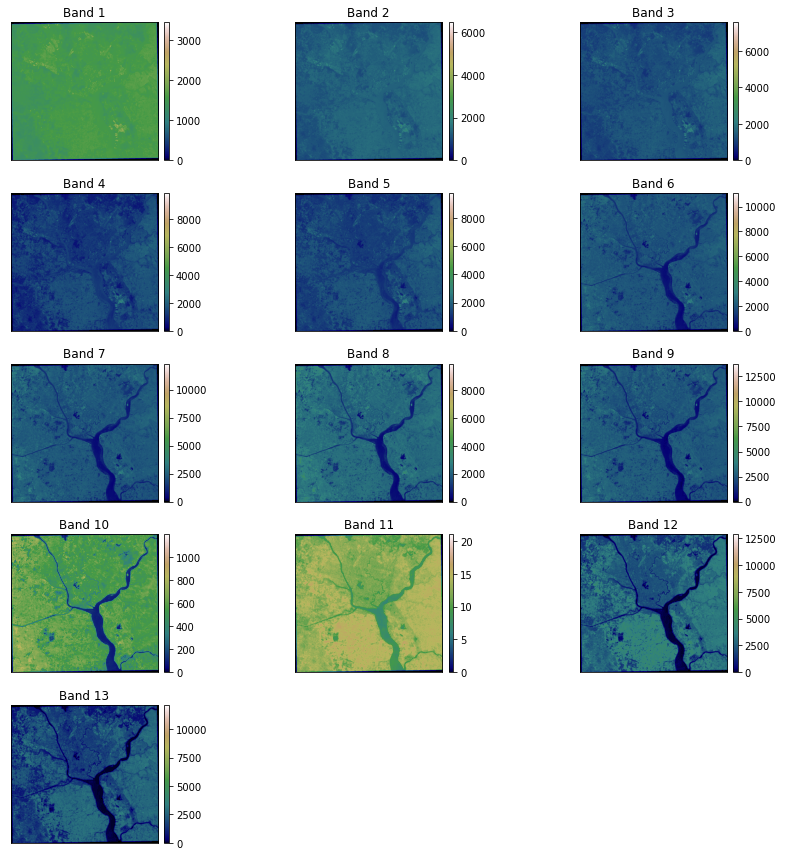

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23b2854dd0>,
      dtype=object)

In [9]:
#Plotting each bands
ep.plot_bands(featuresTrain,cmap='gist_earth')

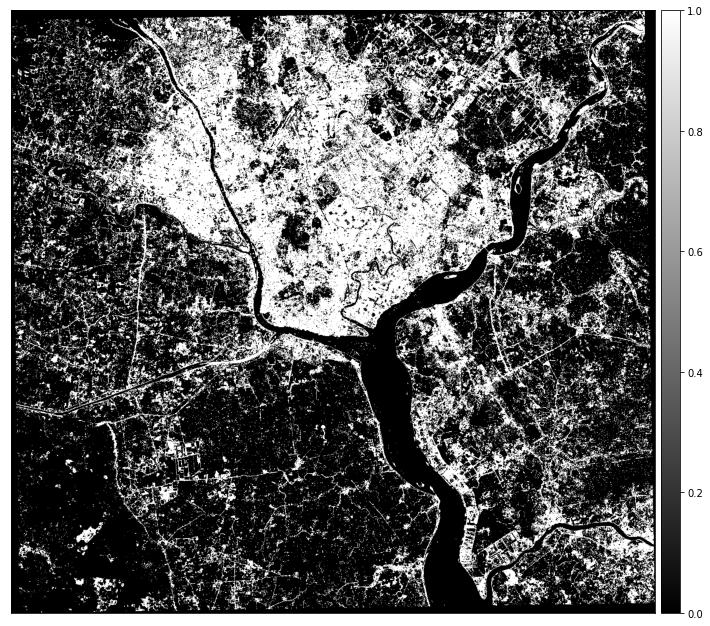

In [10]:
#Plotting Labels
ep.plot_bands(featuresTest, cmap='gray')

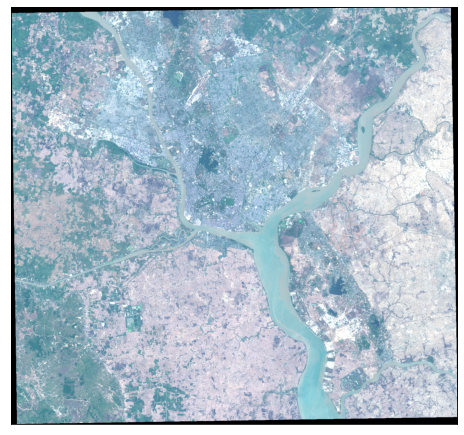

In [40]:
#Visualizing RGB composition
rgb = ep.plot_rgb(featuresTrain,rgb=(3,2,1),stretch=True,figsize=(8,10),)
plt.show()

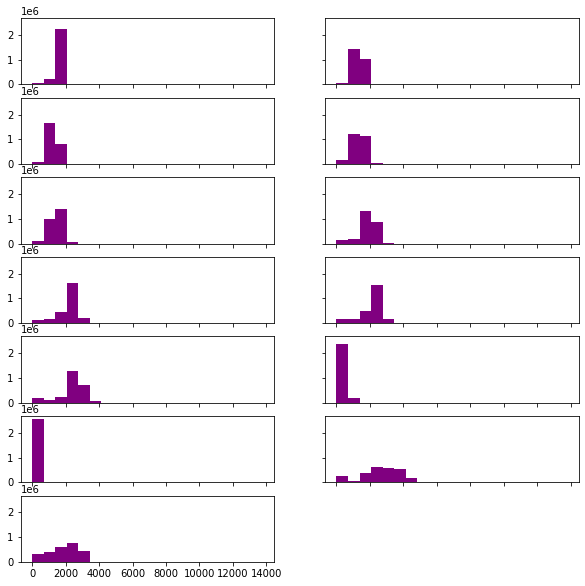

In [12]:
ep.hist(featuresTrain,colors='purple',figsize=(10,10))
plt.show()

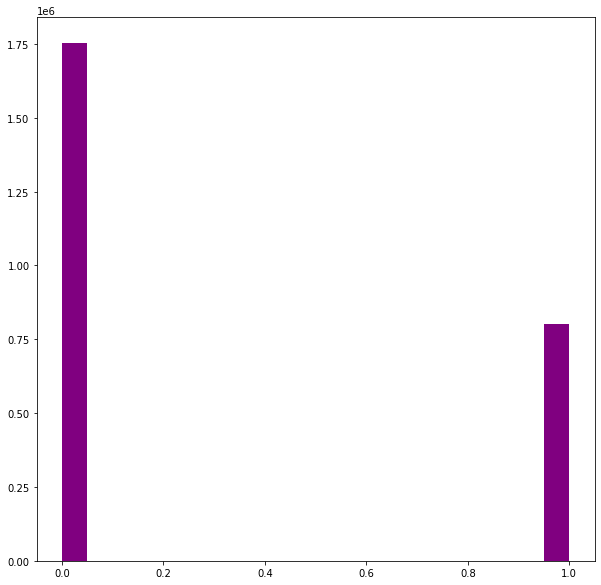

In [13]:
ep.hist(featuresTest,colors='purple',figsize=(10,10))
plt.show()

In [14]:
#Data preprocessing
x = np.moveaxis(featuresTrain,0,-1)
print(x.shape)
y = featuresTest
print(y.shape)
y = changeDimension(y)
print(y.shape)

(1546, 1652, 13)
(1546, 1652)
(2553992,)


In [15]:
#data scaling
from sklearn.preprocessing import StandardScaler
x = x.reshape(-1,13)
print(x.shape)
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.shape)
print(y.shape)

(2553992, 13)
(2553992, 13)
(2553992,)


In [16]:
#Data splitting
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_scaled,y, test_size = 0.30)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1787794, 13)
(766198, 13)
(1787794,)
(766198,)


In [17]:

xtrain = xtrain/255.0 
xtest=xtest/255.0
x_scaled=x_scaled/255.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn_pred= knn.predict(xtest)


In [ ]:
print('Accuracy : {}'.format(accuracy_score(ytest,knn_pred)*100))

Accuracy : 95.97741053879022


In [ ]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    525950
           1       0.94      0.93      0.94    240248

    accuracy                           0.96    766198
   macro avg       0.95      0.95      0.95    766198
weighted avg       0.96      0.96      0.96    766198



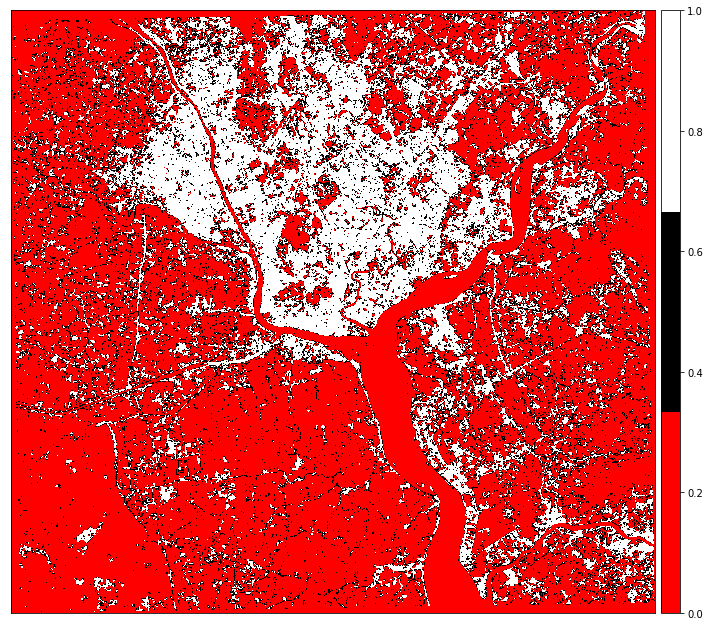

In [ ]:
ep.plot_bands(knn.predict(x_scaled).reshape(1546, 1652),cmap=ListedColormap(['red','black','white']))
plt.show()

# **K-means Classification ( Unsupervised )**


In [20]:
#importing modules and libraries
from sklearn.cluster import KMeans
import gdal
import numpy as np

In [32]:
km = KMeans(n_clusters=5) # defining number of clusters 
km.fit(x_scaled)
km.predict(x_scaled)

out_data = km.labels_.reshape((1546, 1652))



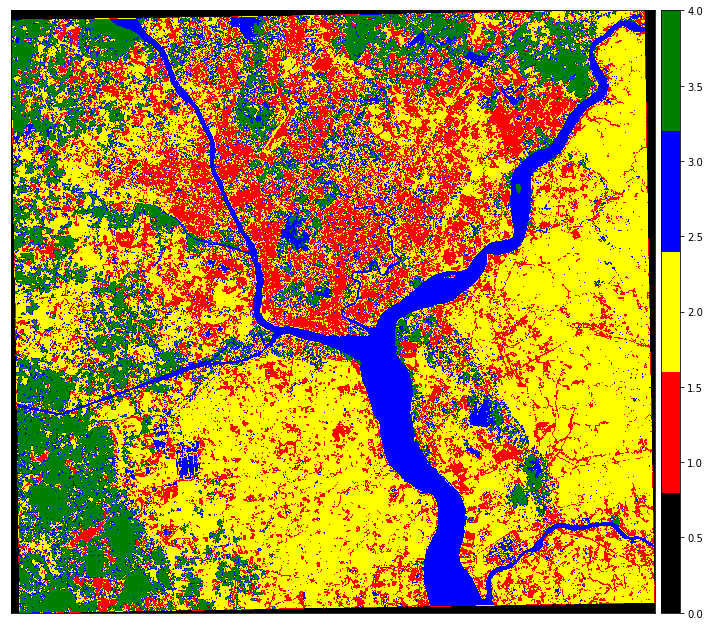

In [37]:
ep.plot_bands(out_data,cmap=ListedColormap(['black','red','yellow','blue','green']))
plt.show()


In [41]:
#Exporting data
outFile = 'unsupervised_classification_predicted.tif'
raster.export(out_data, ds1, filename=outFile, dtype='float')